# D&D Name generator

In [1]:
%matplotlib inline

import os
import sys
import pprint
from collections import defaultdict
PROJECT_ROOT = os.path.dirname(os.getcwd())
sys.path.append(PROJECT_ROOT)

import numpy as np
import matplotlib.pyplot as plt

from data import DnDCharacterNameDataset
from train import RNNLayerTrainer
from generator import RNNLayerGenerator
from utils import read_log

## Dataset

Basic information about dataset

In [2]:
# Read the dataset
dataset = DnDCharacterNameDataset(os.path.join(PROJECT_ROOT, "data"))

# Print sample from dataset
train, target = dataset[4]
print("Name: {}".format(train['name']))
print("Gender: {}".format(train['gender']))  # List genders and races are just convinient way of storing information per
print("Race: {}".format(train['race']))      # letter for later transformation to indices
print("Target letters: {}".format(target))

Name: ['M', 'y', 'r', 'k', 'a']
Gender: ['female', 'female', 'female', 'female', 'female']
Race: ['dragonborn', 'dragonborn', 'dragonborn', 'dragonborn', 'dragonborn']
Target letters: ['y', 'r', 'k', 'a', '.']


**How many names per race?**

defaultdict(<class 'int'>, {'dragonborn': 154, 'dwarf': 218, 'elf': 202, 'halfling': 171, 'halforc': 124, 'human': 260, 'tiefling': 193})


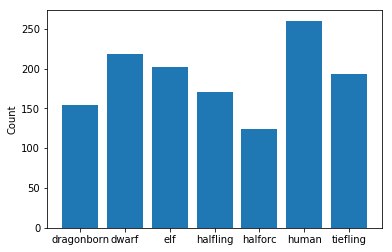

In [3]:
counter = defaultdict(int)

for train, target in dataset:
    race = train['race'][0]
    counter[race] += 1
print(counter)
    
x = np.arange(len(counter))
labels, y = zip(*counter.items())

plt.bar(x, y, tick_label=labels)
plt.ylabel("Count")
plt.show()

**How mana names with same first later?**

defaultdict(<class 'int'>, {'A': 117, 'K': 65, 'L': 53, 'M': 105, 'N': 57, 'O': 34, 'S': 99, 'T': 95, 'V': 59, 'Z': 21, 'B': 75, 'C': 50, 'D': 74, 'E': 55, 'F': 41, 'G': 58, 'H': 52, 'J': 22, 'P': 38, 'Q': 13, 'R': 65, 'U': 14, 'I': 30, 'X': 6, 'W': 17, 'Y': 7})


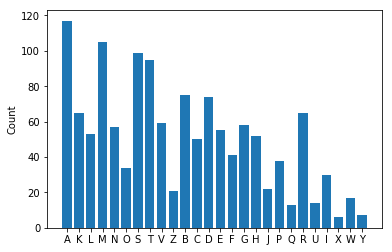

In [4]:
counter = defaultdict(int)

for train, target in dataset:
    first_letter = train['name'][0]
    counter[first_letter] += 1
print(counter)
    
x = np.arange(len(counter))
labels, y = zip(*counter.items())

plt.bar(x, y, tick_label=labels)
plt.ylabel("Count")
plt.show()

## Training

Training configuration

In [5]:
epochs = 300
batch_size = 128
hidden_size = 128
learning_rate = 0.0001
device = "cuda"
logfile = "train_loss.log"
verbose = 0  # Removing outputs during training

Initialize trainer

In [6]:
trainer = RNNLayerTrainer(os.path.join(PROJECT_ROOT, "data"),
                          epochs=epochs,
                          batch_size=batch_size,
                          hidden_size=hidden_size,
                          lr=learning_rate,
                          device=device,
                          logfile=logfile,
                          verbose=verbose)

Run training loop for number of `epochs` and log losses. Models will be saved on 25 epoch intervals.

In [7]:
trainer.run_train_loop()

Started training!
Finished training!


Plot losses during training

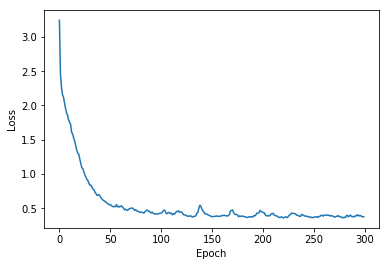

In [8]:
epochs, losses = read_log(os.path.join(PROJECT_ROOT, "train_loss.log"))

assert len(epochs) == len(losses), "Mismatch lengths. {} != {}".format(len(epochs), len(losses))

plt.plot(np.arange(len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## Evaluation

* Examination of name quality over epochs
* Comparision between generated names and real examples